# Simulating the effective reproduction number R<sub>eff</sub>

In the last etivity, you derived the expression for the basic reproduction number R<sub>0</sub> in the simple SIR model: we get an epidemic only if $\beta$/$\gamma$ > 1, i.e. if the average number of secondary cases caused by a single infected case in a totally susceptible population is greater than 1. As susceptibility declines over the course of the epidemic, the effective reproduction number R<sub>eff</sub> determines the shape of the epidemic curve as it reflects the amount of immunity in the population at any given time.

Remember that in a simple homogenous SIR model, R<sub>eff</sub> is directly related to the proportion of the population that is susceptible:
\begin{align}
R_{eff} = R_{0} \frac{S}{N}
\end{align}

In this etivity, your task is to model an epidemic and study the connection between the behaviour of R<sub>eff</sub> and the epidemic curve. Like in the previous etivities, we are looking at a closed fully susceptible population, into which a single infected person is introduced. The rest is up to you! Use your previously developed SIR code and chose your combination of parameters so that R<sub>0</sub> > 1. Solve the differential equations, and use the output to calculate R<sub>eff</sub> at each timestep. Then, generate 2 plots for comparison: one of the proportion of susceptible, infected and recovered individuals over time, and one of the effective reproduction number over time. 

Comparing the changes over time is easiest if you can align the R<sub>eff</sub> plot directly below the SIR proportion plot. To achieve this, include the code for the 2 plots right after each other in the same cell, and move the legend of the proportion plot to the bottom using the theme command. Use help(theme) or search the internet to find out how!

In [76]:
# Modelling the epidemic

# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

initial_state_values <- c(S = 1e6 - 1,
                          I = 1,
                          R = 0)
parameters <- c(beta = 8, gamma = 0.5)

# TIMESTEPS:

times <- seq(from = 0, to = 25, by = 1)

sir_model <- function(time, state, parameters) {  
    
    with(as.list(c(state, parameters)), {     
      
        N <- S+I+R
        lambda <- beta * I/N
        dS <- -lambda * S
        dI <- lambda * S - gamma * I
        dR <- gamma * I
    
        return(list(c(dS, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))
Reff <- data.frame(
   time = output$time, 
   reff = parameters["beta"]/parameters["gamma"] *
                output$S/(output$S+output$I+output$R)
)

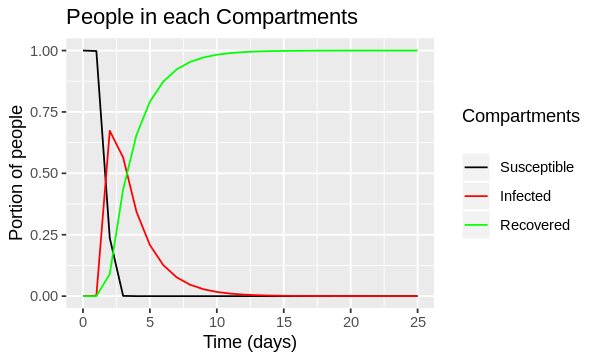

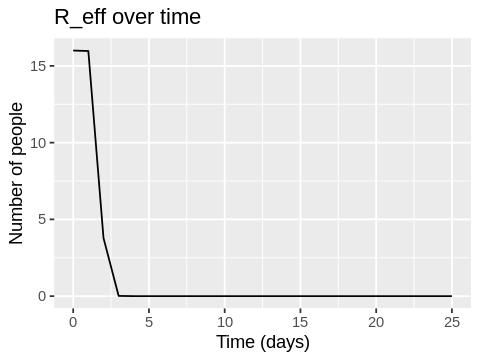

In [77]:
# Plotting the proportion of people in each compartment over time

output_long <- melt(as.data.frame(output), id = "time")                  

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output_long,          # specify object containing data to plot
       aes(x = time, y = value / 1e6, group = variable, colour = variable)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "People in each Compartments", x = "Time (days)", y = "Portion of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Susceptible", "Infected", "Recovered"), values = c("black", "red", "green"))

# Plotting Reff

reff_long <- melt(as.data.frame(Reff), id = "time")                  

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(data = reff_long,          # specify object containing data to plot
       aes(x = time, y = value)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "R_eff over time", x = "Time (days)", y = "Number of people", color = "Compartments\n")

### Question: How does R<sub>eff</sub> vary over the course of the epidemic? What do you notice about the connection between the change in R<sub>eff</sub> and the epidemic curve over time? In relation to R<sub>eff</sub>, when does the epidemic peak and start to decline?

R<sub>eff</sub> is highest when everyone is susceptible. 

at the beginning, R<sub>eff</sub> = R<sub>0</sub>.

The peak happens when R<sub>eff</sub> goes down to 1.